In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import load_model
from keras.applications import EfficientNetB5

2024-04-09 10:59:10.439074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 10:59:10.439185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 10:59:10.686255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
conv_base=EfficientNetB5(
weights='imagenet',
include_top=False,
input_shape=(150,150,3)
)

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/clahe-plant-disease/New folder (2)/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)
valid=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/clahe-plant-disease/New folder (2)/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 18740 files belonging to 2 classes.
Found 1410 files belonging to 2 classes.


In [11]:
conv_base.layers

[<InputLayer name=input_layer, built=True>,
 <Rescaling name=rescaling, built=True>,
 <Normalization name=normalization, built=True>,
 <Rescaling name=rescaling_1, built=True>,
 <ZeroPadding2D name=stem_conv_pad, built=True>,
 <Conv2D name=stem_conv, built=True>,
 <BatchNormalization name=stem_bn, built=True>,
 <Activation name=stem_activation, built=True>,
 <DepthwiseConv2D name=block1a_dwconv, built=True>,
 <BatchNormalization name=block1a_bn, built=True>,
 <Activation name=block1a_activation, built=True>,
 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>,
 <Reshape name=block1a_se_reshape, built=True>,
 <Conv2D name=block1a_se_reduce, built=True>,
 <Conv2D name=block1a_se_expand, built=True>,
 <Multiply name=block1a_se_excite, built=True>,
 <Conv2D name=block1a_project_conv, built=True>,
 <BatchNormalization name=block1a_project_bn, built=True>,
 <DepthwiseConv2D name=block1b_dwconv, built=True>,
 <BatchNormalization name=block1b_bn, built=True>,
 <Activation name=block1

In [12]:
model=Sequential()
model.add(conv_base)

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb5 (Functional)     │ ?                      │    28,513,527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,513,527 (108.77 MB)

 Trainable params: 28,340,784 (108.11 MB)

 Non-trainable params: 172,743 (674.78 KB)

In [14]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [15]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

In [16]:
history=model.fit(train,epochs=15,validation_data=valid,callbacks=[callback])

Epoch 1/15


I0000 00:00:1712661065.191596      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712661065.427101      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.8604 - loss: 13.9420

W0000 00:00:1712661386.517329      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712661400.535323      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 573s 598ms/step - accuracy: 0.8605 - loss: 13.9390 - val_accuracy: 0.9645 - val_loss: 8.8880
Epoch 2/15


W0000 00:00:1712661415.494180      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


586/586 ━━━━━━━━━━━━━━━━━━━━ 167s 285ms/step - accuracy: 0.9748 - loss: 7.5226 - val_accuracy: 0.9766 - val_loss: 4.3057
Epoch 3/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 166s 283ms/step - accuracy: 0.9854 - loss: 3.5693 - val_accuracy: 0.9823 - val_loss: 1.9595
Epoch 4/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 167s 284ms/step - accuracy: 0.9892 - loss: 1.6341 - val_accuracy: 0.9872 - val_loss: 0.8963
Epoch 5/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 166s 284ms/step - accuracy: 0.9918 - loss: 0.7309 - val_accuracy: 0.9887 - val_loss: 0.4057
Epoch 6/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 166s 283ms/step - accuracy: 0.9931 - loss: 0.3347 - val_accuracy: 0.9922 - val_loss: 0.1953
Epoch 7/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 167s 285ms/step - accuracy: 0.9963 - loss: 0.1520 - val_accuracy: 0.9908 - val_loss: 0.1008
Epoch 8/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 167s 284ms/step - accuracy: 0.9966 - loss: 0.0736 - val_accuracy: 0.9929 - val_loss: 0.0605
Epoch 9/15
586/586 ━━━━━━━━━━━━━━━━━━━━ 166s 284ms/step - accuracy: 0.9969 - loss: 0.04

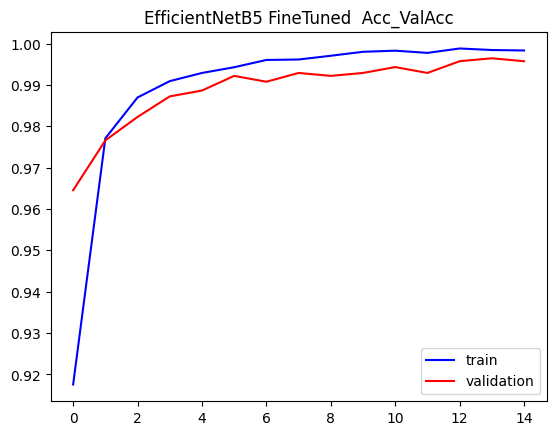

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.title("EfficientNetB5 FineTuned  Acc_ValAcc")
plt.savefig('accuracy_history.png')
plt.show()

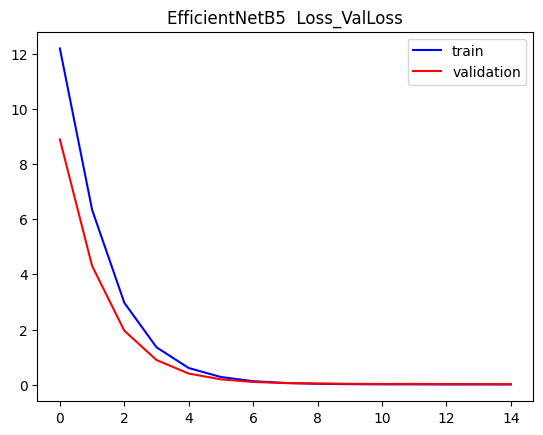

In [18]:
plt.plot(history.history["loss"],color='blue',label='train')
plt.plot(history.history["val_loss"],color='red',label='validation')
plt.legend()
plt.title("EfficientNetB5  Loss_ValLoss")
plt.savefig('loss_history.png')
plt.show()

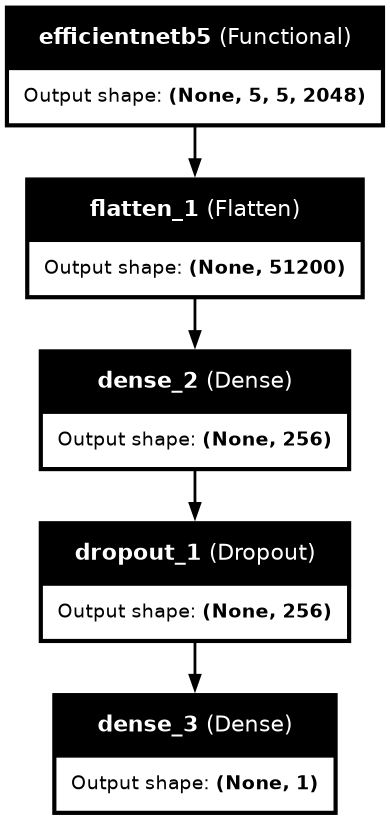

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=False, dpi=100, to_file='model1.png')

In [20]:
import cv2

In [21]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG")

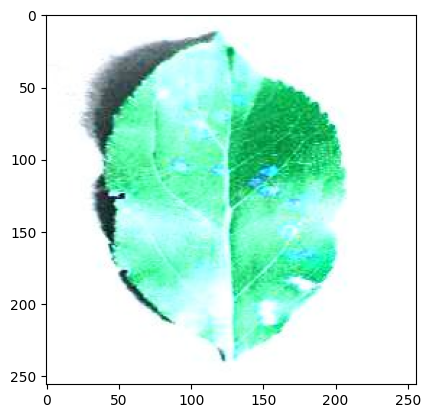

In [22]:
plt.imshow(test_img)

In [23]:
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)

In [24]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


array([[0.79517716]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.9999758]], dtype=float32)

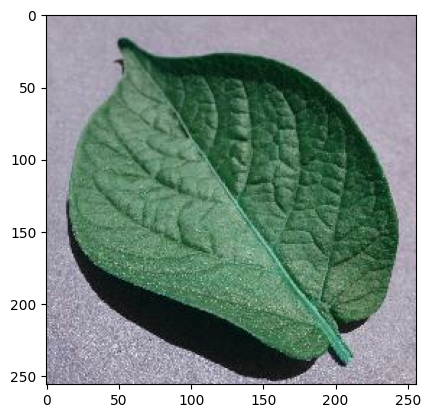

In [25]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy1.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.00065795]], dtype=float32)

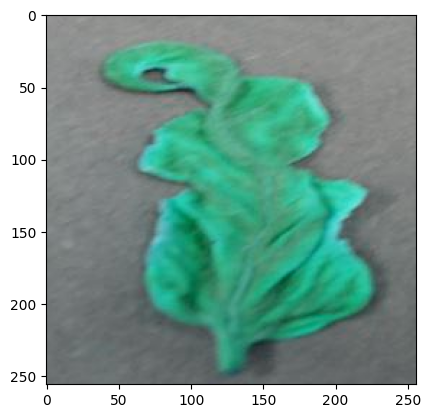

In [26]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus5.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.02073952]], dtype=float32)

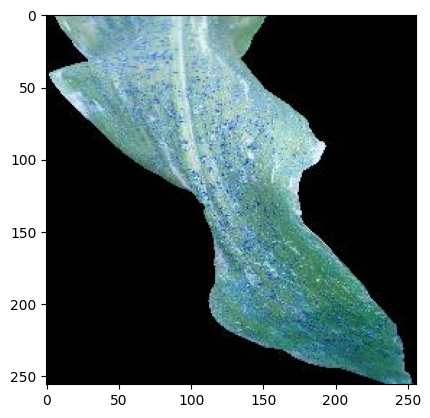

In [27]:
test_img=cv2.imread("/kaggle/input/new-plant-diseases-dataset/test/test/CornCommonRust3.JPG")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.00696865]], dtype=float32)

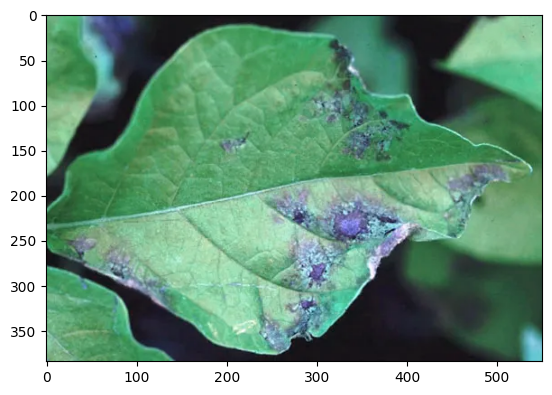

In [28]:
test_img=cv2.imread("/kaggle/input/himanshu1/Defected5.webp")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb5 (Functional)     │ (None, 5, 5, 2048)     │    28,513,527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,069,739 (316.89 MB)

 Trainable params: 41,448,497 (158.11 MB)

 Non-trainable params: 172,743 (674.78 KB)

 Optimizer params: 41,448,499 (158.11 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[6.1629964e-07]], dtype=float32)

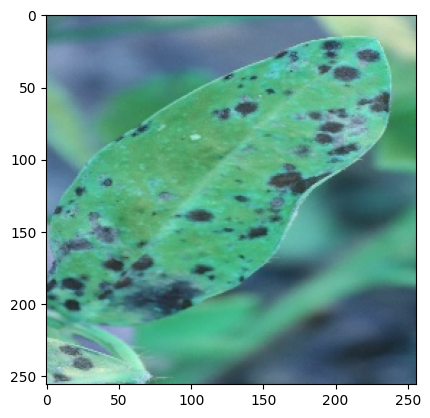

In [30]:
test_img=cv2.imread("/kaggle/input/groundnuttest/New folder/Defected/25.jpg")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

In [31]:
import cv2
from matplotlib import pyplot as plt
def imgch(img):
    lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
    l,a,b=cv2.split(lab_img)
    equ=cv2.equalizeHist(l)
    updated_lab_img =cv2.merge((equ,a,b))
    return cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[6.1629964e-07]], dtype=float32)

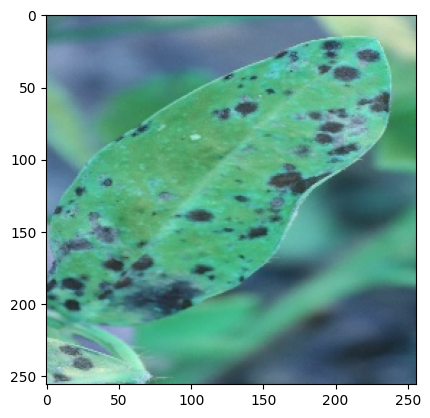

In [32]:
test_img=cv2.imread("/kaggle/input/groundnuttest/New folder/Defected/25.jpg")
plt.imshow(test_img)
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape(1,150,150,3)
model.predict(test_input)

In [74]:
import os
path="/kaggle/input/groundnuttest/New folder/"
im_size=150
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/groundnuttest/New folder/')
leaf_types

['Healthy', 'Defected']

In [75]:
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=imgch(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)

409
3116


In [76]:
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)

In [77]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [78]:
y_pr=model.predict(images)

111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step


In [79]:
y_p=(y_pr>0.25)

In [80]:
import pandas as pd

In [81]:
y_p=pd.DataFrame(y_p)

In [82]:
y_predict=np.where(y_p[0]==True,1,0)

test accuracy: 83.0071 %




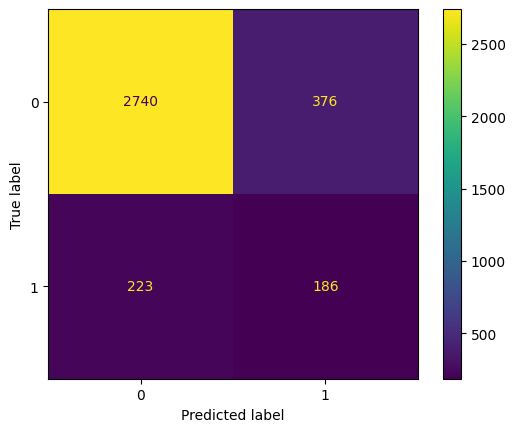

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3116
           1       0.33      0.45      0.38       409

    accuracy                           0.83      3525
   macro avg       0.63      0.67      0.64      3525
weighted avg       0.86      0.83      0.84      3525



In [83]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

58
549
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
test accuracy: 16.9687 %




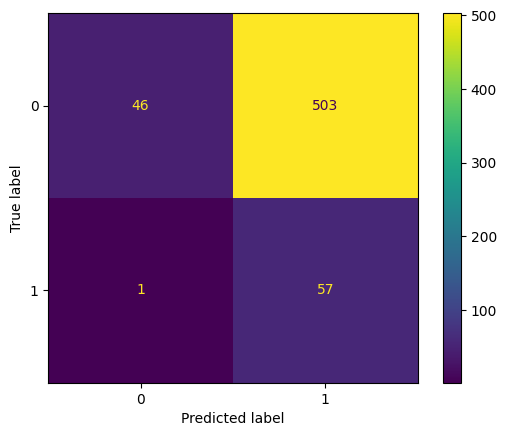

              precision    recall  f1-score   support

           0       0.98      0.08      0.15       549
           1       0.10      0.98      0.18        58

    accuracy                           0.17       607
   macro avg       0.54      0.53      0.17       607
weighted avg       0.89      0.17      0.16       607



In [84]:
import os
path="/kaggle/input/cirtustesting/New folder/"
im_size=150
images=[]
labels=[]
leaf_types=os.listdir('/kaggle/input/cirtustesting/New folder/')
leaf_types
for i in leaf_types:
  data_path=path+str(i)
  filenames=[i for i in os.listdir(data_path)]
  print(len(filenames))
  #print(filenames)
  for f in filenames:
    img=cv2.imread(data_path+'/'+f)
    img=imgch(img)
    img=cv2.resize(img,(im_size,im_size))
    images.append(img)
    labels.append(i)
import numpy as np
images=np.array(images)
#images=images.astype("float32")/255
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
y=labels
l=LabelEncoder()
l.fit(["Defected","Healthy"])
list(l.classes_)
y=l.transform(y)
y_pr=model.predict(images)
y_p=(y_pr>0.25)
y_p=pd.DataFrame(y_p)
y_predict=np.where(y_p[0]==True,1,0)
test_accu = np.sum(y == y_predict) / len(y) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")
cm=confusion_matrix(y, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y, y_predict))

In [44]:
model.evaluate(valid)

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9951 - loss: 0.0211


[0.02238069288432598, 0.9957447052001953]